<a href="https://colab.research.google.com/github/rithwik-tech/Zomato-Data-Analysis/blob/main/Zomate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())


                 name online_order book_table   rate  votes  \
0        Tasty Treats          Yes        Yes  4.1/5    775   
1  Elephant Spice Hub          Yes         No  4.1/5    787   
2  Choco Cafe Delight          Yes         No  3.8/5    918   
3       Udupi's Feast           No         No  3.7/5     88   
4    Village Grandeur           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                 name online_order book_table  rate  votes  \
0        Tasty Treats          Yes        Yes   4.1    775   
1  Elephant Spice Hub          Yes         No   4.1    787   
2  Choco Cafe Delight          Yes         No   3.8    918   
3       Udupi's Feast           No         No   3.7     88   
4    Village Grandeur           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

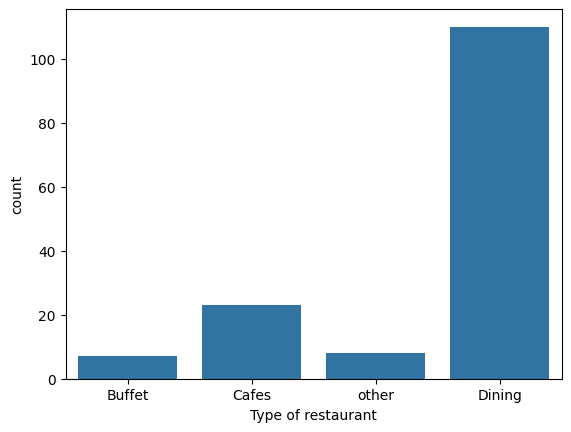

In [5]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

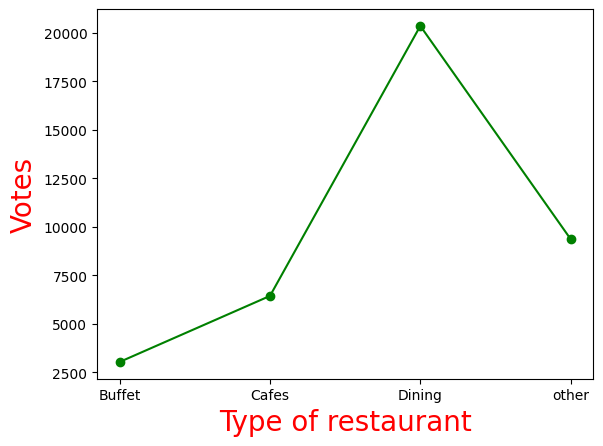

In [6]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

In [7]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Maruthi Dosa
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

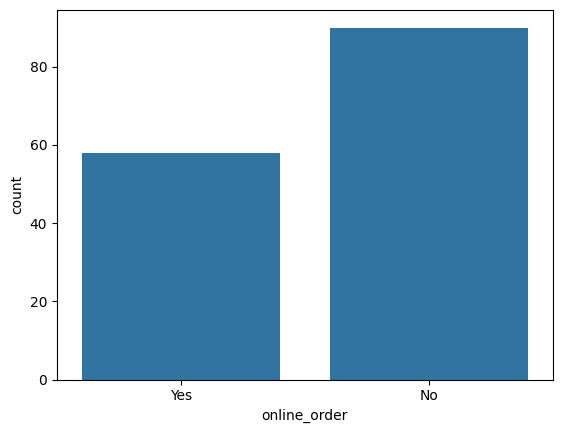

In [9]:
sns.countplot(x=dataframe['online_order']) # Changed 'data' to 'dataframe'

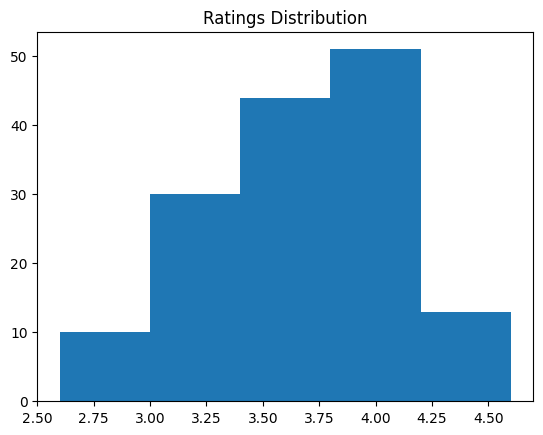

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

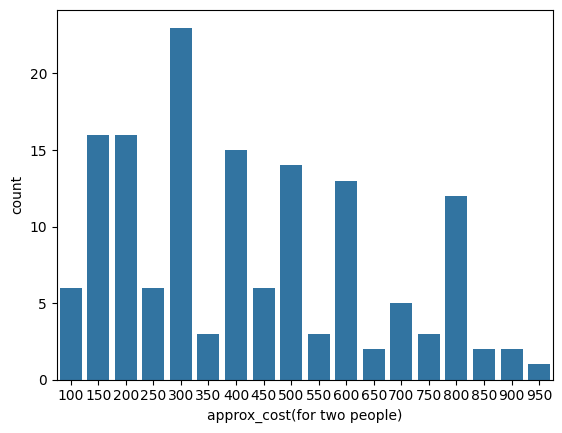

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

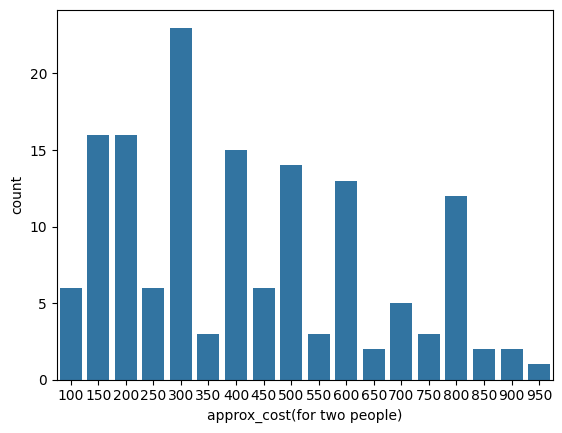

In [12]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

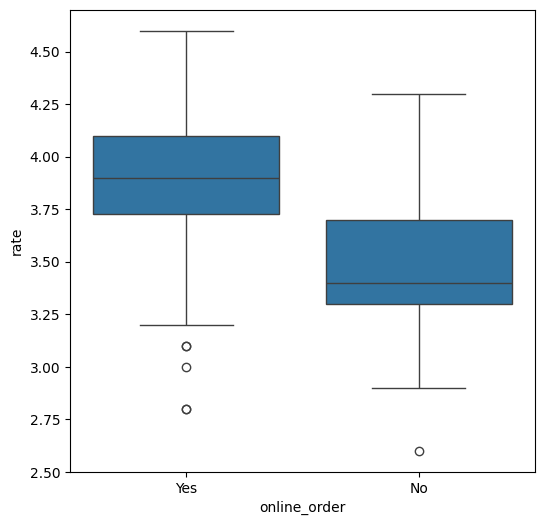

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

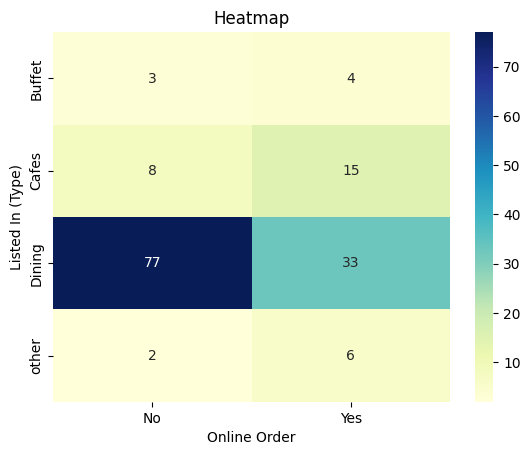

In [14]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'rate' is the target variable you want to predict
# and you have selected relevant features for prediction.

# Feature Selection (example)
features = ['approx_cost(for two people)', 'votes', 'online_order'] # Replace with actual relevant features
X = dataframe[features]
y = dataframe['rate']

# Convert 'online_order' to numerical (if not already)
X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})


# Handle missing values (if any) - Example using imputation with mean:
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model (example using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1844581740204688


<ipython-input-16-ae221b220036>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})


In [19]:
new_data = pd.DataFrame({
    'approx_cost(for two people)': [800, 1200],
    'votes': [150, 500],
    'online_order': [1, 0]  # 1 for 'Yes', 0 for 'No'
})

# Ensure new data has the same features and data types as training data
new_data = new_data[X.columns]

# Make predictions
new_predictions = model.predict(new_data)
print("Predictions for new data:")
print(new_predictions)

# Example: Access individual predictions
print(f"Prediction 1: {new_predictions[0]}")
print(f"Prediction 2: {new_predictions[1]}")

Predictions for new data:
[3.81253298 3.65067823]
Prediction 1: 3.8125329791694287
Prediction 2: 3.650678231766818


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# ... (Your existing code for data loading and preprocessing)

# Feature Selection (example)
features = ['approx_cost(for two people)', 'votes', 'online_order']
X = dataframe[features]
y = dataframe['rate']

# Convert 'online_order' to numerical (if not already)
X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})


# Handle missing values (if any) - Example using imputation with mean:
X = X.fillna(X.mean())


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression - Mean Squared Error: {lr_mse}, R-squared: {lr_r2}")

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42) # Added random_state for reproducibility
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree Regression - Mean Squared Error: {dt_mse}, R-squared: {dt_r2}")


# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # Added random_state and n_estimators
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Regression - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}")

Linear Regression - Mean Squared Error: 0.1844581740204688, R-squared: 0.13517213680755436
Decision Tree Regression - Mean Squared Error: 0.1656203703703704, R-squared: 0.22349274154337717
Random Forest Regression - Mean Squared Error: 0.16572679765722062, R-squared: 0.2229937596817122


<ipython-input-21-06bc86b16e26>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['online_order'] = X['online_order'].map({'Yes': 1, 'No': 0})


In [23]:
new_data = pd.DataFrame({
    'approx_cost(for two people)': [800, 1200],
    'votes': [150, 500],
    'online_order': [1, 0]  # 1 for 'Yes', 0 for 'No'
})

# Ensure new data has the same features and data types as training data
new_data = new_data[X.columns]

# Make predictions
new_predictions = model.predict(new_data)
print("Predictions for new data:")
new_predictions

Predictions for new data:


array([3.81253298, 3.65067823])

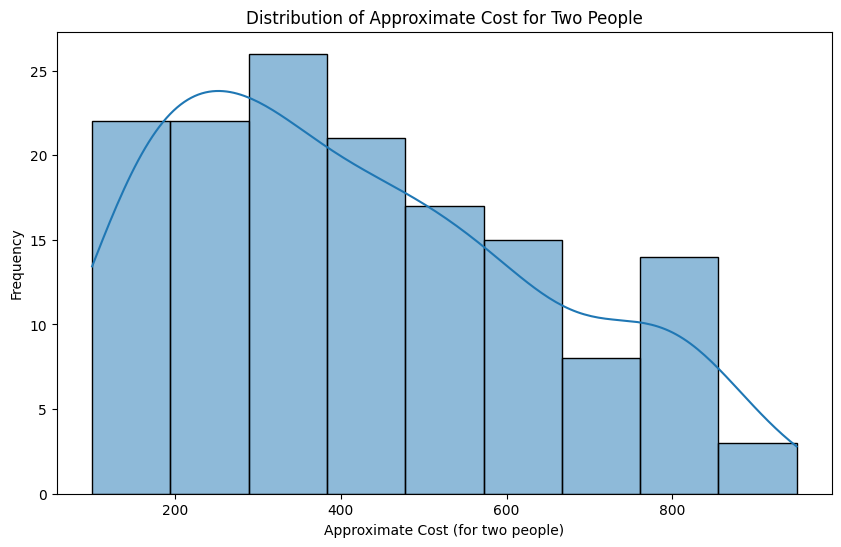

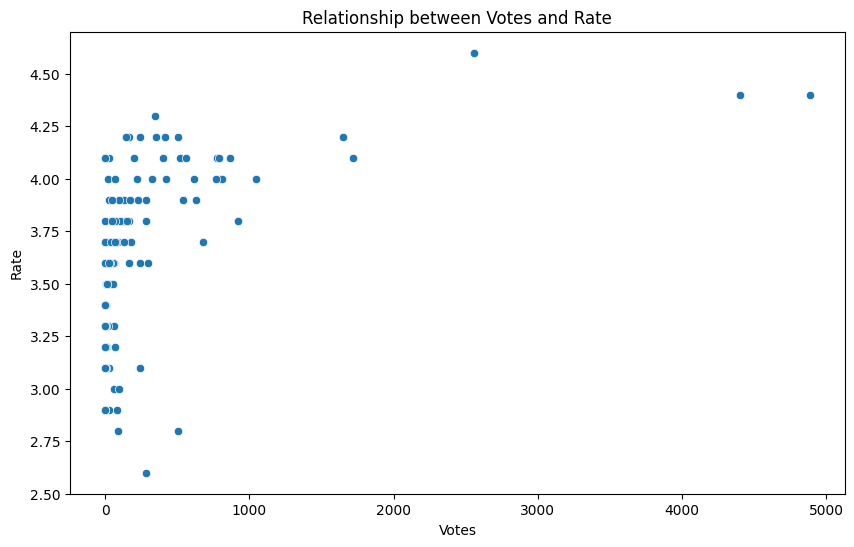

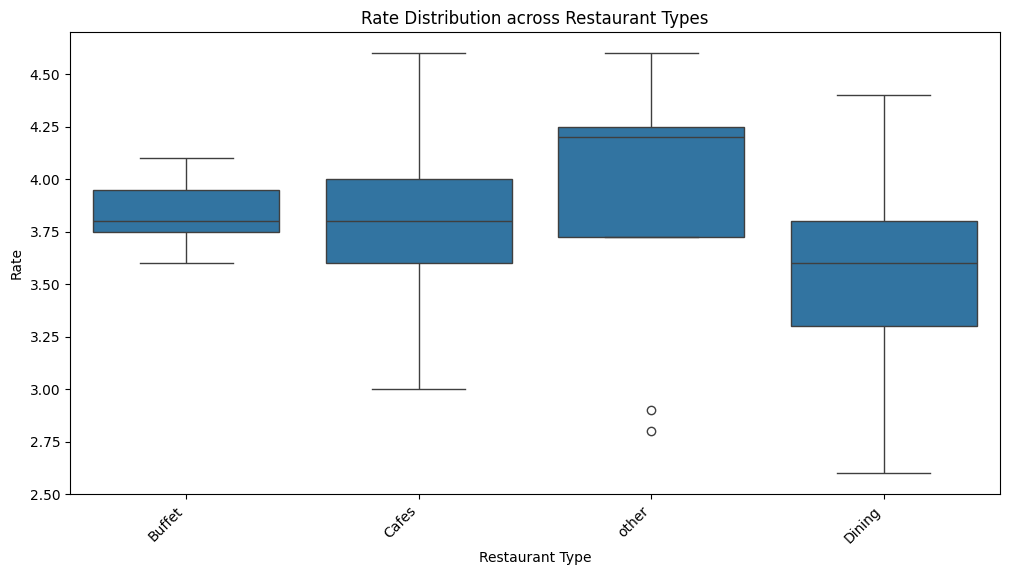

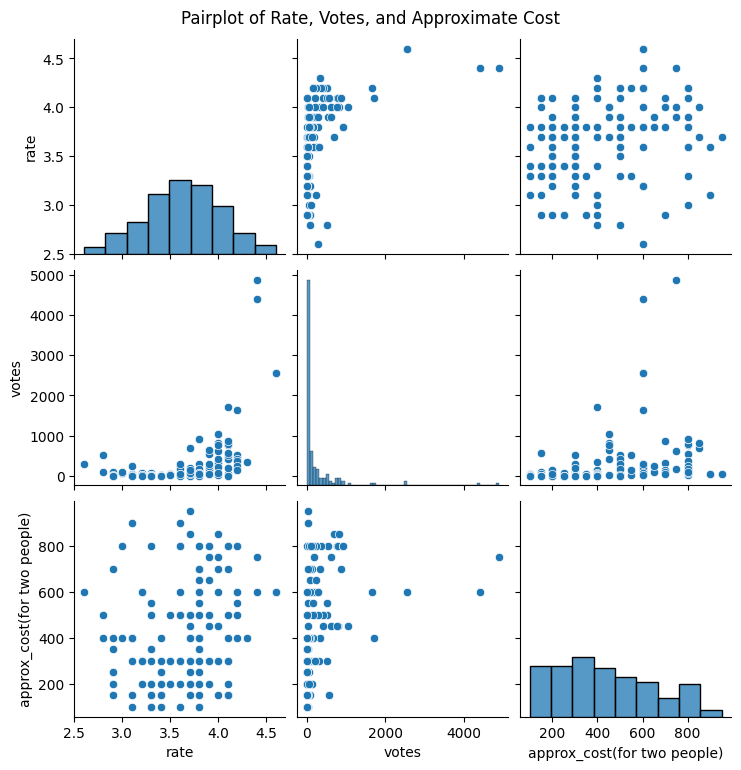

In [25]:
# Plotting the distribution of 'approx_cost(for two people)'
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['approx_cost(for two people)'], kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot to visualize the relationship between 'votes' and 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=dataframe)
plt.title('Relationship between Votes and Rate')
plt.xlabel('Votes')
plt.ylabel('Rate')
plt.show()

# Box plot of 'rate' for different 'listed_in(type)'
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in(type)', y='rate', data=dataframe)
plt.title('Rate Distribution across Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

# Pairplot to visualize relationships between multiple features
sns.pairplot(dataframe[['rate', 'votes', 'approx_cost(for two people)']])
plt.suptitle('Pairplot of Rate, Votes, and Approximate Cost', y=1.02)
plt.show()

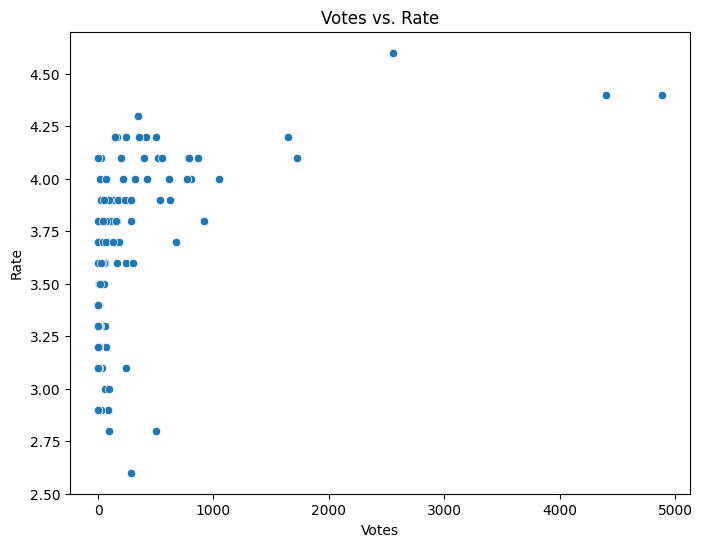

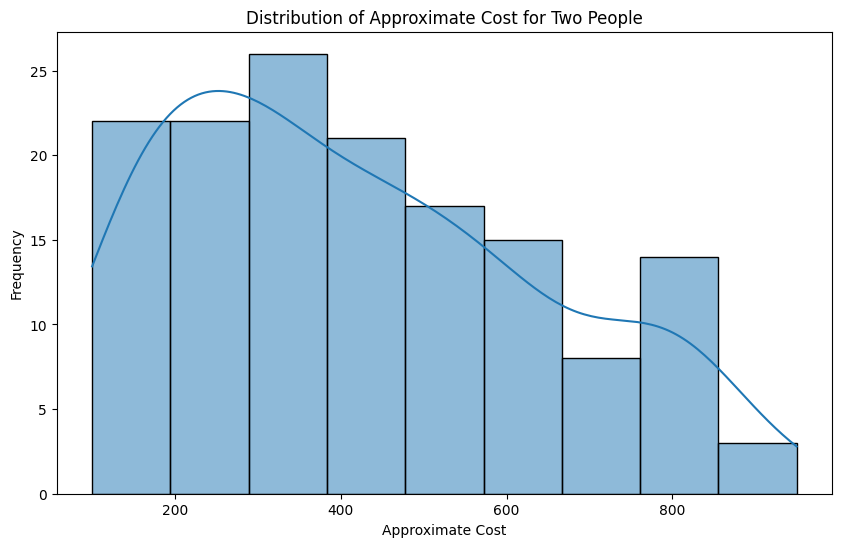

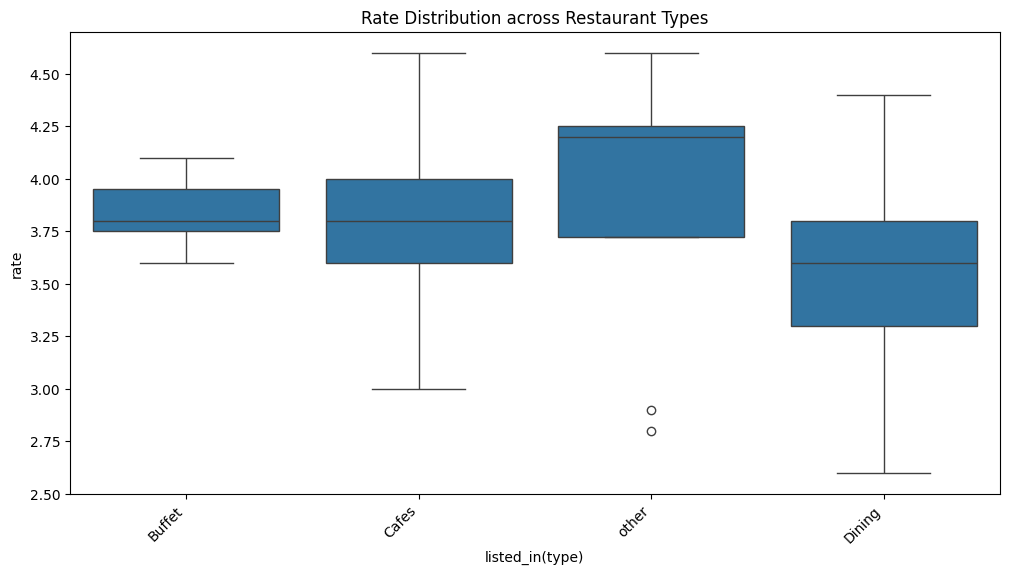

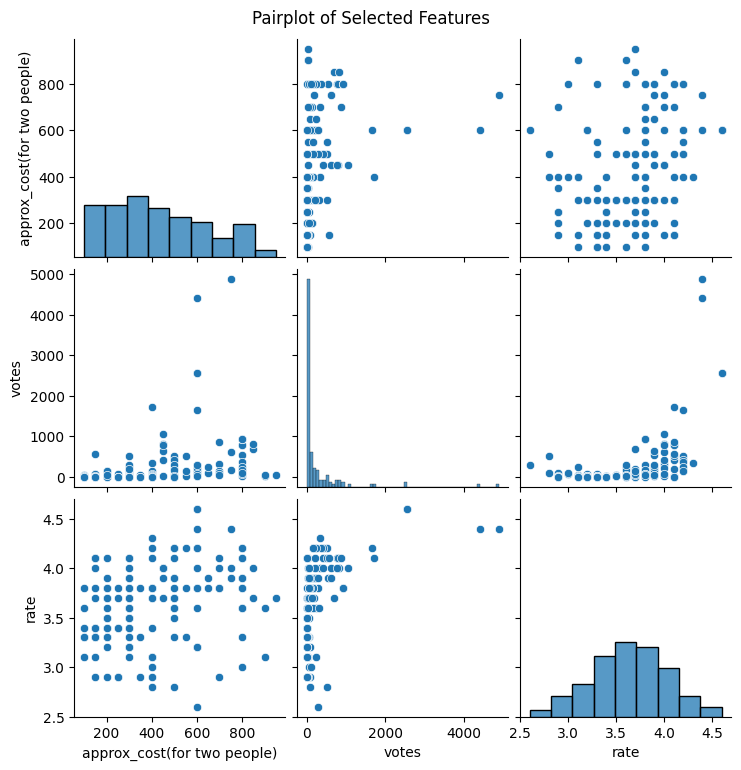

In [27]:

#Scatter plot of votes vs. rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='votes', y='rate', data=dataframe)
plt.title('Votes vs. Rate')
plt.xlabel('Votes')
plt.ylabel('Rate')
plt.show()

#Distribution of approx cost
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['approx_cost(for two people)'], kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.show()


#Box plot of rate across different types of restaurants
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in(type)', y='rate', data=dataframe)
plt.title('Rate Distribution across Restaurant Types')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


# Pairplot for selected features and the rate
selected_features = ['approx_cost(for two people)', 'votes', 'rate']
sns.pairplot(dataframe[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02) # Add title to the entire pairplot
plt.show()


In [28]:
new_restaurant_data = pd.DataFrame({
    'approx_cost(for two people)': [800],  # Replace with actual values
    'votes': [1000],                     # Replace with actual values
    'online_order': [1]                  # Replace with actual values (1 for Yes, 0 for No)
})

# Ensure the order of columns in the new_restaurant_data matches X
new_restaurant_data = new_restaurant_data[X.columns]

predicted_rating = model.predict(new_restaurant_data)
print(f"Predicted rating for the new restaurant: {predicted_rating[0]}")

Predicted rating for the new restaurant: 3.988879879971521


In [34]:
 #Find the restaurant with the most orders (votes) and highest rating
restaurant_with_max_votes = dataframe.loc[dataframe['votes'].idxmax()]
print("\nRestaurant with the most orders (votes):")
print(restaurant_with_max_votes[['name', 'votes', 'rate']])


restaurant_with_highest_rating = dataframe.loc[dataframe['rate'].idxmax()]
print("\nRestaurant with the highest rating:")
print(restaurant_with_highest_rating[['name', 'votes', 'rate']])


Restaurant with the most orders (votes):
name     Maruthi Dosa
votes            4884
rate              4.4
Name: 38, dtype: object

Restaurant with the highest rating:
name     Cafe Onesta
votes           2556
rate             4.6
Name: 7, dtype: object


In [36]:
dataframe = pd.read_csv("Zomato data .csv")

# Preprocess the 'rate' column
def handleRate(value):
    try:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    except (IndexError, ValueError):
        return np.nan  # Handle cases with invalid 'rate' values

dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe['online_order'] = dataframe['online_order'].map({'Yes': 1, 'No': 0})

# Feature Selection (example)
features = ['approx_cost(for two people)', 'votes', 'online_order']
X = dataframe[features]
y = dataframe['rate']

# Handle missing values by removing rows with NaN in 'rate'
dataframe.dropna(subset=['rate'], inplace=True)

# Redefine X and y after dropping NaN values
X = dataframe[features]
y = dataframe['rate']
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")
    return mse, r2

# Train and evaluate each model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}
results = {}

for model_name, model in models.items():
    mse, r2 = train_and_evaluate(model, model_name)
    results[model_name] = {"MSE": mse, "R-squared": r2}

# Find and print the best model based on R-squared (higher is better)
best_model = max(results, key=lambda k: results[k]["R-squared"])
print(f"\nBest Model based on R-squared: {best_model}")

#Example prediction with the best model (replace with your actual data)
new_restaurant_data = pd.DataFrame({
    'approx_cost(for two people)': [800],
    'votes': [1000],
    'online_order': [1]
})
new_restaurant_data = new_restaurant_data[X.columns]
predicted_rating = models[best_model].predict(new_restaurant_data)
print(f"Predicted rating for the new restaurant using {best_model}: {predicted_rating[0]}")

Linear Regression - Mean Squared Error: 0.1844581740204688, R-squared: 0.13517213680755436
Decision Tree - Mean Squared Error: 0.1656203703703704, R-squared: 0.22349274154337717
Random Forest - Mean Squared Error: 0.16572679765722062, R-squared: 0.2229937596817122

Best Model based on R-squared: Decision Tree
Predicted rating for the new restaurant using Decision Tree: 3.8
